https://www.consumerfinance.gov/data-research/hmda/explore \
https://www.ffiec.gov/hmda/hmdaproducts.htm

# Statistical Data Mining Project 

In [3]:
# !pip install TPOT

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skm
from tpot import TPOTClassifier

C:\Users\tsmur\AppData\Roaming\Python\Python37\site-packages\dask\dataframe\utils.py:14: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
import pickle
import joblib

In [3]:
def get_data(drop1,nr = 10000,nona = 1):
    data = pd.read_csv(r"C:\Users\tsmur\Desktop\StatDataMining\Project\hmda_lar.csv", nrows = nr)
    data.replace(' ', None)
    data.replace('', None)
    c = ['rate_spread','sequence_number','co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3','applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2','denial_reason_name_3', 'denial_reason_name_2',
         'denial_reason_name_1','action_taken_name','agency_name','county_name',
       'applicant_race_name_1','applicant_race_name_5','purchaser_type_name',
       'co_applicant_race_name_2', 'co_applicant_race_name_1','application_date_indicator',
         'respondent_id','state_name','edit_status_name','msamd_name','state_abbr']
    c.remove(drop1)
    data = data.drop(columns = c)
    print(data.shape)
    if nona == 1:
        data = data.dropna()
    names = ['agency_abbr','applicant_ethnicity_name','co_applicant_sex_name',
             'co_applicant_ethnicity_name','preapproval_name','applicant_sex_name',
             'hoepa_status_name','lien_status_name','loan_purpose_name','loan_type_name','owner_occupancy_name',
             'property_type_name']
    for i in names:
        data = pd.concat([data,pd.get_dummies(data[i], prefix=i)],axis=1)
        data.drop([i],axis=1, inplace=True)
    print(data.shape)
    mapping = dict(zip(data[drop1].unique(),[i for i in range(len(data[drop1].unique()))]))
    print(mapping)
    data = data.replace({drop1: mapping})
    for i in data.columns:
        data[i]=data[i].astype(int)
    data[drop1].hist()
    print(data.columns)
    return data, mapping

In [4]:
def post_proc(X,model):
    """
    Need Post processing support like
    1. What to do with the output of feature importance
    """
    for ind,val in zip(X.columns,model.feature_importances_*100):
        if val>1:
            print(ind,val)

In [5]:
def build_model(X,y,cross = 5,models = ['xgb']):
    """
    Need support for more models, along with cross validation and feature importances which can be easily taken out
    something like
    build_model(X,y,cross = 5,model)
        if model == 'xgb':
            ...
        if model == 'logistic'
            ...
    """
    seed = 7
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    for model1 in models:
        if model1 == 'xgb':
            print("XGBoost Classifier: \n")
            model = XGBClassifier()
            model.fit(X_train,y_train)
            joblib.dump(model, 'xgb.pkl')
            pred = model.predict(X_test)
            pred = pred.astype(int)
            y_test = y_test.astype(int)
            print("Balanced Accuracy is ",balanced_accuracy_score(y_test,pred)*100)
            results = cross_val_score(model, X_train, y_train, cv=cross,scoring = 'balanced_accuracy')
            print("Cross Validation Balanced Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
            post_proc(X,model)
        if model1 == 'Logistic':
            print("\n Logistic Classifier: \n")
            model = LogisticRegression(solver = 'liblinear')
            model.fit(X_train, y_train)
            joblib.dump(model, 'logi.pkl')
            pred = model.predict(X_test)
            prob = model.predict_proba(X_test)
            y_test = y_test.astype(int)
            print("Balanced Accuracy is ",balanced_accuracy_score(y_test,pred)*100)
            results = cross_val_score(model, X_train, y_train, cv=cross,scoring = 'balanced_accuracy')
            print("Cross Validation Balanced Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
            cm = confusion_matrix(y_test, pred)
            fig, ax = plt.subplots(figsize=(8, 8))
            ax.imshow(cm)
            ax.grid(False)
            ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
            ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
            ax.set_ylim(1.5, -0.5)
            for i in range(2):
                for j in range(2):
                    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
            plt.show()
            Logi = pickle.dumps(model) 
        if model1 == 'auto':
            tpot = TPOTClassifier(verbosity=2, max_time_mins=2,scoring = 'balanced_accuracy')
            tpot.fit(X_train, y_train)
            print(tpot.score(X_test, y_test))

In [6]:
data = pd.read_csv(r"C:\Users\tsmur\Desktop\StatDataMining\Project\hmda_lar.csv", nrows = 50000)

FileNotFoundError: [Errno 2] File C:\Users\tsmur\Desktop\StatDataMining\Project\hmda_lar.csv does not exist: 'C:\\Users\\tsmur\\Desktop\\StatDataMining\\Project\\hmda_lar.csv'

In [35]:
np.shape(data)

(50000, 47)

In [36]:
data.replace(' ', None)
data.replace('', None)

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,63.500000,NaN,7067.0,72.080002,1201.0,1303.0,400.0,107600.0,90.0,Virginia,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
1,238.119995,NaN,5429.0,6.560000,1611.0,1807.0,525.0,77500.0,300.0,Illinois,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
2,38.189999,NaN,6869.0,30.719999,236.0,794.0,225.0,61800.0,NaN,Michigan,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
3,132.320007,NaN,3835.0,65.739998,1027.0,1141.0,621.0,75200.0,255.0,California,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Application denied by financial institution
4,87.500000,NaN,1960.0,55.459999,407.0,601.0,181.0,50000.0,109.0,California,...,Male,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,37.680000,NaN,2453.0,99.309998,158.0,716.0,197.0,77500.0,39.0,Illinois,...,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Application withdrawn by applicant
49996,109.589996,NaN,4790.0,4.340000,1267.0,2212.0,130.0,62500.0,58.0,New York,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
49997,93.349998,NaN,6570.0,93.589996,1604.0,1814.0,98.0,72500.0,40.0,Texas,...,Female,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,File closed for incompleteness
49998,136.539993,NaN,5167.0,50.490002,1497.0,1891.0,146.0,61900.0,70.0,New Mexico,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated


In [37]:
data.isna().sum()

tract_to_msamd_income               182
rate_spread                       48472
population                          182
minority_population                 182
number_of_owner_occupied_units      182
number_of_1_to_4_family_units       182
loan_amount_000s                     10
hud_median_family_income            182
applicant_income_000s              5689
state_name                           12
state_abbr                           12
sequence_number                   50000
respondent_id                         0
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
msamd_name                         6610
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
edit_status_name                  50000
denial_reason_name_3              49756
denial_reason_name_2              48353


In [38]:
data[data['agency_abbr'] == 'HUD'].isna().sum()

tract_to_msamd_income               150
rate_spread                       24499
population                          150
minority_population                 150
number_of_owner_occupied_units      150
number_of_1_to_4_family_units       150
loan_amount_000s                     10
hud_median_family_income            150
applicant_income_000s              2989
state_name                            0
state_abbr                            0
sequence_number                   25525
respondent_id                         0
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
msamd_name                         3042
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
edit_status_name                  25525
denial_reason_name_3              25482
denial_reason_name_2              25193


In [39]:
data[data['agency_abbr'] == 'HUD']

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,63.500000,NaN,7067.0,72.080002,1201.0,1303.0,400.0,107600.0,90.0,Virginia,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
4,87.500000,NaN,1960.0,55.459999,407.0,601.0,181.0,50000.0,109.0,California,...,Male,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
6,98.430000,NaN,1828.0,13.570000,615.0,725.0,123.0,79600.0,84.0,Michigan,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
9,49.389999,NaN,2977.0,81.389999,317.0,1174.0,34.0,70800.0,195.0,Pennsylvania,...,Male,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Application denied by financial institution
16,74.860001,1.85,6003.0,60.919998,1122.0,1520.0,171.0,63200.0,80.0,California,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,78.099998,NaN,5409.0,4.510000,1586.0,2194.0,140.0,63800.0,40.0,Colorado,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
49995,37.680000,NaN,2453.0,99.309998,158.0,716.0,197.0,77500.0,39.0,Illinois,...,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Application withdrawn by applicant
49996,109.589996,NaN,4790.0,4.340000,1267.0,2212.0,130.0,62500.0,58.0,New York,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
49997,93.349998,NaN,6570.0,93.589996,1604.0,1814.0,98.0,72500.0,40.0,Texas,...,Female,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,File closed for incompleteness


In [40]:
data = data.drop(columns = ['rate_spread','sequence_number','co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3','applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2','denial_reason_name_3', 'denial_reason_name_2','denial_reason_name_1',
       'applicant_race_name_1','applicant_race_name_5',
       'co_applicant_race_name_2', 'co_applicant_race_name_1','application_date_indicator','respondent_id','state_name','edit_status_name','msamd_name'])

In [41]:
data = data.dropna()

In [42]:
data['action_taken_name'].unique()

array(['Loan originated', 'Application denied by financial institution',
       'Application withdrawn by applicant',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Application approved but not accepted',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

In [43]:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_abbr,purchaser_type_name,...,county_name,co_applicant_sex_name,co_applicant_ethnicity_name,census_tract_number,as_of_year,applicant_sex_name,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,63.500000,7067.0,72.080002,1201.0,1303.0,400.0,107600.0,90.0,VA,"Life insurance company, credit union, mortgage...",...,Fairfax County,Male,Not Hispanic or Latino,4522.00,2017,Female,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
1,238.119995,5429.0,6.560000,1611.0,1807.0,525.0,77500.0,300.0,IL,Loan was not originated or was not sold in cal...,...,Cook County,No co-applicant,No co-applicant,8198.01,2017,Male,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
3,132.320007,3835.0,65.739998,1027.0,1141.0,621.0,75200.0,255.0,CA,Loan was not originated or was not sold in cal...,...,Sacramento County,Female,Not Hispanic or Latino,93.30,2017,Male,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Application denied by financial institution
4,87.500000,1960.0,55.459999,407.0,601.0,181.0,50000.0,109.0,CA,"Life insurance company, credit union, mortgage...",...,Fresno County,Female,Not Hispanic or Latino,49.02,2017,Male,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
5,138.160004,7120.0,23.309999,2037.0,2431.0,70.0,68800.0,238.0,SC,Loan was not originated or was not sold in cal...,...,Charleston County,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",46.09,2017,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Consumer Financial Protection Bureau,CFPB,Application denied by financial institution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,37.680000,2453.0,99.309998,158.0,716.0,197.0,77500.0,39.0,IL,Loan was not originated or was not sold in cal...,...,Cook County,No co-applicant,No co-applicant,2608.00,2017,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Application withdrawn by applicant
49996,109.589996,4790.0,4.340000,1267.0,2212.0,130.0,62500.0,58.0,NY,Loan was not originated or was not sold in cal...,...,Essex County,No co-applicant,No co-applicant,9610.00,2017,Male,"Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
49997,93.349998,6570.0,93.589996,1604.0,1814.0,98.0,72500.0,40.0,TX,Loan was not originated or was not sold in cal...,...,Fort Bend County,No co-applicant,No co-applicant,6726.02,2017,Female,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,File closed for incompleteness
49998,136.539993,5167.0,50.490002,1497.0,1891.0,146.0,61900.0,70.0,NM,Freddie Mac (FHLMC),...,Bernalillo County,No co-applicant,No co-applicant,47.28,2017,Male,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated


In [44]:
for ind,val in zip(data['action_taken_name'].unique(),[i for i in range(len(data['action_taken_name'].unique()))]):
    A = {}
    A.update({ind:val}) 

In [45]:
C = dict(zip(data['action_taken_name'].unique(),[i for i in range(len(data['action_taken_name'].unique()))]))

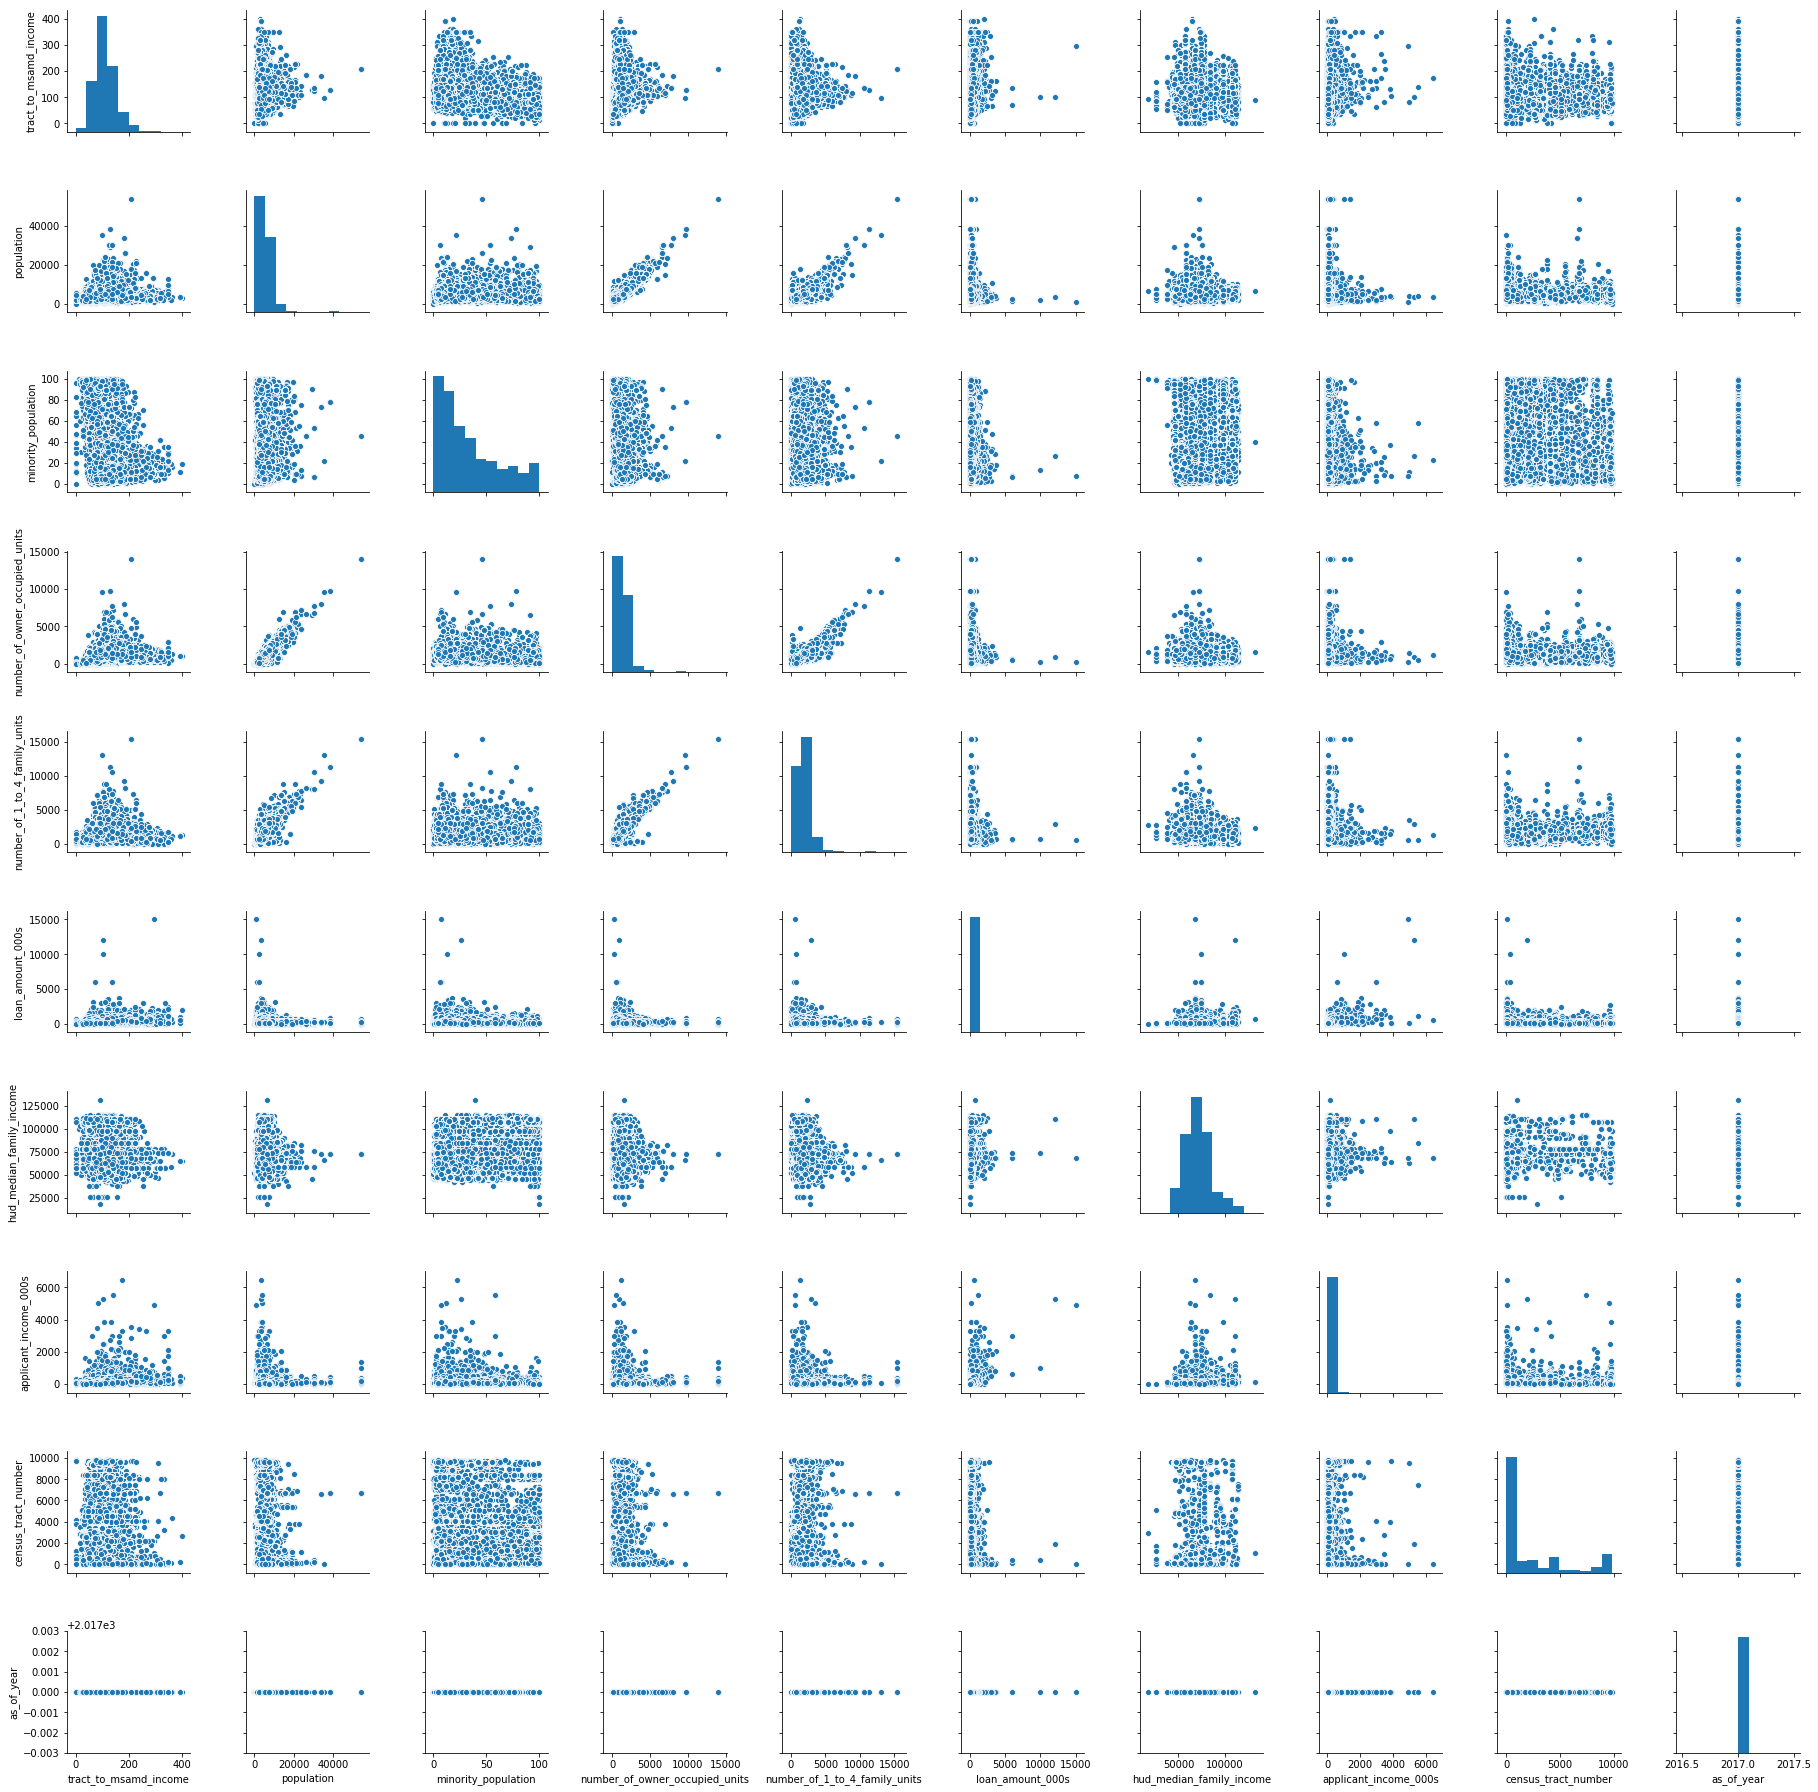

In [46]:
import seaborn as sns
sns.pairplot(data)

In [47]:
for i in data.columns.unique():
    print(i,"-----\n", data[i].unique(),"\n")

tract_to_msamd_income -----
 [ 63.5        238.11999512 132.32000732 ... 154.83999634  54.90999985
  37.68000031] 

population -----
 [7067. 5429. 3835. ... 1219. 3972. 3132.] 

minority_population -----
 [72.08000183  6.55999994 65.73999786 ... 75.98999786 90.73999786
 99.30999756] 

number_of_owner_occupied_units -----
 [1201. 1611. 1027. ...   65. 2459.  198.] 

number_of_1_to_4_family_units -----
 [1303. 1807. 1141. ... 3002.  682.  525.] 

loan_amount_000s -----
 [ 400.  525.  621. ... 1180.  854.  743.] 

hud_median_family_income -----
 [107600.  77500.  75200.  50000.  68800.  79600.  58400.  70800.  79300.
  83900. 108300.  63200.  72400.  73700.  97400.  72000.  67900.  67600.
  53000.  59800. 110800.  67700.  57400.  55800.  75700.  60600.  52500.
  59000.  73900.  53700.  54200.  75400.  69000.  84100.  74300.  68100.
  66300.  64700.  58000.  69200.  65600.  49700.  73400.  61900.  50800.
  75000.  45300.  49300.  57600.  69500.  72200.  76800.  72500.  90200.
  67300.  674

In [48]:
names = ['agency_abbr','agency_name','applicant_ethnicity_name','co_applicant_sex_name', 'co_applicant_ethnicity_name','preapproval_name','applicant_sex_name','county_name','hoepa_status_name','lien_status_name','loan_purpose_name','loan_type_name','owner_occupancy_name','property_type_name','purchaser_type_name','state_abbr']
for i in names:
    data = pd.concat([data,pd.get_dummies(data[i], prefix=i)],axis=1)
    data.drop([i],axis=1, inplace=True)

In [49]:
mapping = {'Loan originated': 1, 'Application denied by financial institution': 2, 'Application withdrawn by applicant':3,'File closed for incompleteness':4,'Loan purchased by the institution':5,'Application approved but not accepted':6,'Preapproval request denied by financial institution':7,
       'Preapproval request approved but not accepted': 8}
data = data.replace({'action_taken_name': mapping})

In [50]:
for i in data.columns:
    data[i].astype(int)

In [51]:
y1 = data['action_taken_name'].astype(int)

(array([2.1313e+04, 1.0277e+04, 6.4190e+03, 0.0000e+00, 1.9210e+03,
        2.6930e+03, 0.0000e+00, 1.5260e+03, 2.0000e+00, 3.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

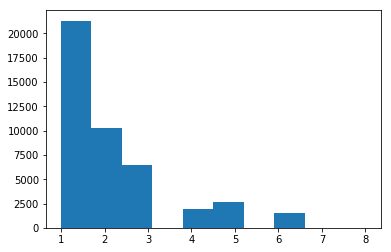

In [52]:
plt.hist(y1)

In [53]:
s1 = data[data['action_taken_name'] == 1].sample(n = 10000)
s2 = data[data['action_taken_name'] == 2].sample(n = 10000)
d = pd.concat([s1,s2])

In [54]:
y = d['action_taken_name']
X = d.drop(columns = ['action_taken_name'])

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred = pred.astype(int)
y_test = y_test.astype(int)
# print(balanced_accuracy_score(y_test,pred)*100)

In [56]:
100-((sum(y_test != pred)/len(y_test))*100)

90.36363636363636

In [57]:
print(balanced_accuracy_score(y_test,pred)*100)

90.29533136602514


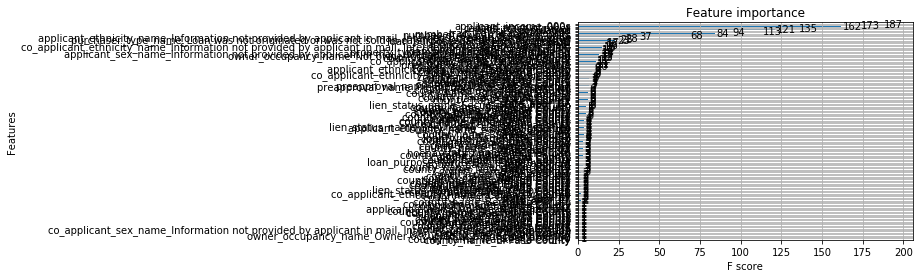

<Figure size 2160x3600 with 0 Axes>

In [58]:
from xgboost import plot_importance
plot_importance(model)
plt.figure(figsize=(30,50))
plt.savefig('feature')

In [59]:
a = model.feature_importances_*100

In [60]:
for ind,val in zip(X.columns,model.feature_importances_*100):
    if val > 0.5:
        print(ind,val)

agency_abbr_CFPB 3.4235868
agency_abbr_HUD 4.036893
preapproval_name_Not applicable 0.7388822
county_name_Aiken County 0.54479474
county_name_Hartford County 0.82163924
county_name_Johnson County 0.9239717
county_name_Pinellas County 0.596538
county_name_Racine County 0.9582894
loan_purpose_name_Home purchase 0.74455816
loan_type_name_Conventional 1.2102646
purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register 48.601402
state_abbr_CT 0.6923755
state_abbr_FL 0.8895881
state_abbr_NE 0.66164064
state_abbr_UT 0.6727802


In [61]:
roc_auc_score(y_test, pred)

0.9029533136602514

In [5]:
def get_data(drop1,nr = 10000,nona = 1,res = 0,year = 2017,sk = 0):
    if year == 2017:
        data = pd.read_csv(r"C:\Users\tsmur\Desktop\Spring2020\StatDataMining\Project\hmda_"+str(year)+"_nationwide_all-records_codes.csv", nrows = nr,skiprows=[i for i in range(1,sk)])
    elif year <= 2016:
        data = pd.read_csv(r"C:\Users\tsmur\Desktop\Spring2020\StatDataMining\Project\hmda_"+str(year)+"_nationwide_all-records_labels.csv", nrows = nr,skiprows=[i for i in range(1,sk)])
    else:
        print("Year not found")
    data = data.replace(' ', None)
    data = data.replace('', None)
    data = data.replace('NA', None)
    if res == 1:
        c = ['rate_spread','sequence_number','co_applicant_race_5','agency_code',
       'co_applicant_race_4', 'co_applicant_race_3','applicant_race_4','census_tract_number',
       'applicant_race_3', 'applicant_race_2','denial_reason_3', 'denial_reason_2',
         'denial_reason_1','county_code', 'purchaser_type',
       'applicant_race_1','applicant_race_5','as_of_year','preapproval',
       'co_applicant_race_2', 'co_applicant_race_1','application_date_indicator',
         'respondent_id','state_code','edit_status','msamd']
        c.remove(drop1)
        data = data.drop(columns = c)
        print(np.shape(data))
        if nona == 1:
            data = data.dropna()
        data = data[data['action_taken'] == 3]
        data = data.drop(columns = ['action_taken'])
        print(np.shape(data))
        return data
    c = ['rate_spread','sequence_number','co_applicant_race_5','agency_code',
       'co_applicant_race_4', 'co_applicant_race_3','applicant_race_4','census_tract_number',
       'applicant_race_3', 'applicant_race_2','denial_reason_3', 'denial_reason_2',
         'denial_reason_1','action_taken','county_code', 'purchaser_type',
       'applicant_race_1','applicant_race_5','as_of_year','preapproval',
       'co_applicant_race_2', 'co_applicant_race_1','application_date_indicator',
         'respondent_id','state_code','edit_status','msamd']
    c.remove(drop1)
    data = data.drop(columns = c)
    print(np.shape(data))
    if nona == 1:
        data = data.dropna()
    # to_cat = ['owner_occupancy', 'co_applicant_ethnicity', 'loan_type', 'hoepa_status', 'applicant_ethnicity', 
    #             'loan_purpose', 'lien_status', 'applicant_sex', 'co_applicant_sex', 'property_type', 'number_of_owner_occupied_units']
    # for i in to_cat:
    #     data = pd.concat([data,pd.get_dummies(data[i])],axis=1)
    #     data.drop([i],axis=1, inplace=True)
    print("The columns in the data are", data.columns)
    print(np.shape(data))
    return data

(10000, 20)
AxesSubplot(0.125,0.125;0.775x0.755)
(750, 20)


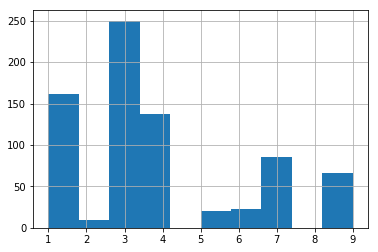

In [25]:
data = pd.read_csv(r"C:\Users\tsmur\Desktop\Spring2020\StatDataMining\Project\hmda_2017_nationwide_all-records_codes.csv", nrows = 10000)
data.replace(' ', None)
data.replace('', None)
data.replace('NA', None)
c = ['rate_spread','sequence_number','co_applicant_race_5','agency_code',
'co_applicant_race_4', 'co_applicant_race_3','applicant_race_4','census_tract_number',
'applicant_race_3', 'applicant_race_2','denial_reason_3', 'denial_reason_2',
 'denial_reason_1','county_code', 'purchaser_type',
'applicant_race_1','applicant_race_5','as_of_year','preapproval',
'co_applicant_race_2', 'co_applicant_race_1','application_date_indicator',
 'respondent_id','state_code','edit_status','msamd']
c.remove('denial_reason_1')
data = data.drop(columns = c)
print(np.shape(data))
data = data.dropna()
# print(data['action_taken'].hist())
print(data['denial_reason_1'].hist())
data = data[data['action_taken'] == 3]
print(np.shape(data))


# Predicting action_taken_name 

In [39]:
ColName = 'action_taken_name'

C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (28,29,38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(100000, 23)
(88458, 56)
{'Loan originated': 0, 'Application denied by financial institution': 1, 'Application withdrawn by applicant': 2, 'File closed for incompleteness': 3, 'Loan purchased by the institution': 4, 'Application approved but not accepted': 5, 'Preapproval request denied by financial institution': 6, 'Preapproval request approved but not accepted': 7}
Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'census_tract_number', 'as_of_year', 'action_taken_name',
       'agency_abbr_CFPB', 'agency_abbr_FDIC', 'agency_abbr_FRS',
       'agency_abbr_HUD', 'agency_abbr_NCUA', 'agency_abbr_OCC',
       'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_ethnicity_name_Not His

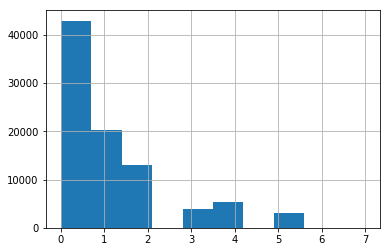

In [40]:
data,mapping = get_data(ColName,nr = 100000)

In [41]:
s1 = data[data[ColName] == 0].sample(n = 20000)
s2 = data[data[ColName] == 1].sample(n = 20000)
d = pd.concat([s1,s2])
y = d[ColName]
X = d.drop(columns = [ColName])

XGBoost Classifier: 

Balanced Accuracy is  76.31626207097361
Cross Validation Balanced Accuracy: 76.01% (0.79%)
tract_to_msamd_income 1.0924265
minority_population 1.4366568
number_of_owner_occupied_units 1.0219452
loan_amount_000s 1.1978768
hud_median_family_income 2.6976607
applicant_income_000s 1.6215278
census_tract_number 2.4975708
agency_abbr_CFPB 5.62561
agency_abbr_FDIC 2.418945
agency_abbr_FRS 2.097409
agency_abbr_HUD 1.183418
applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application 2.5796971
applicant_ethnicity_name_Not Hispanic or Latino 1.1972597
co_applicant_sex_name_Female 1.0310911
co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application 1.1267874
co_applicant_sex_name_No co-applicant 3.2564383
co_applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application 1.3669659
preapproval_name_Preapproval was requested 3.340802
applicant_s

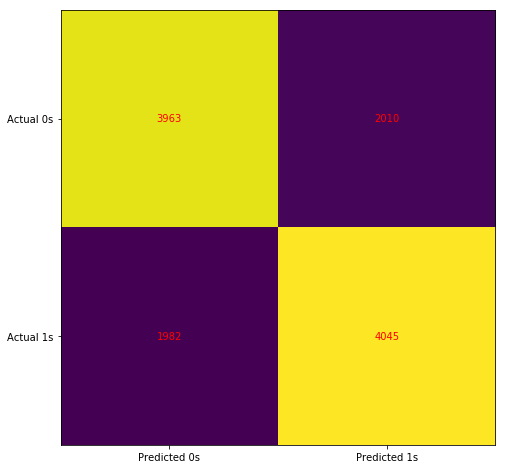

In [42]:
build_model(X,y,cross = 10,models = ['xgb','Logistic'])

# Prediction denial reason 1

In [43]:
ColName = 'denial_reason_name_1'

C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (28,29,38) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(100000, 23)
(14852, 54)
{'Debt-to-income ratio': 0, 'Credit history': 1, 'Credit application incomplete': 2, 'Other': 3, 'Collateral': 4, 'Unverifiable information': 5, 'Insufficient cash (downpayment, closing costs)': 6, 'Employment history': 7, 'Mortgage insurance denied': 8}
Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'denial_reason_name_1', 'census_tract_number', 'as_of_year',
       'agency_abbr_CFPB', 'agency_abbr_FDIC', 'agency_abbr_FRS',
       'agency_abbr_HUD', 'agency_abbr_NCUA', 'agency_abbr_OCC',
       'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_ethnicity_name_Not Hispanic or Latino',
       'applicant_ethnicity_name_Not applicable',
       'co_applican

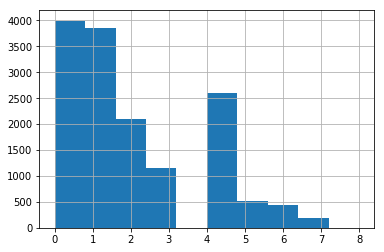

In [44]:
data,mapping = get_data(ColName,nr = 100000)

In [45]:
s1 = data[data[ColName] == 0].sample(n = 3500)
s2 = data[data[ColName] == 1].sample(n = 3500)
d = pd.concat([s1,s2])
y = d[ColName]
X = d.drop(columns = [ColName])

XGBoost Classifier: 

Balanced Accuracy is  66.1412822597033
Cross Validation Balanced Accuracy: 65.57% (2.59%)
tract_to_msamd_income 1.5696869
population 1.4755145
minority_population 1.4933064
number_of_owner_occupied_units 1.558866
number_of_1_to_4_family_units 1.5639337
loan_amount_000s 3.2961142
hud_median_family_income 1.8366765
applicant_income_000s 2.3524847
census_tract_number 1.5684344
agency_abbr_CFPB 2.7404575
agency_abbr_FDIC 2.1066515
agency_abbr_FRS 2.2903314
agency_abbr_HUD 1.8711249
agency_abbr_NCUA 2.0166175
agency_abbr_OCC 1.7503426
applicant_ethnicity_name_Hispanic or Latino 1.9166301
applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application 1.8037388
applicant_ethnicity_name_Not Hispanic or Latino 1.8320266
co_applicant_sex_name_Female 1.4372871
co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application 1.4835923
co_applicant_sex_name_Male 1.9249803
co_applicant_sex_name_N

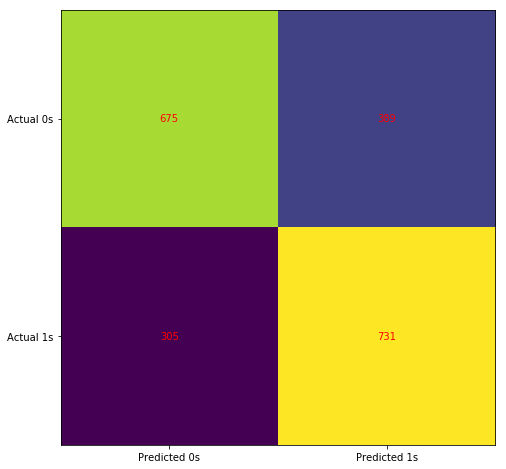

In [46]:
build_model(X,y,cross = 10,models = ['xgb','Logistic'])

# Predicting denial reason 2 

In [47]:
ColName = 'denial_reason_name_2'

C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (28,29,30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(500000, 23)
(14491, 54)
{'Debt-to-income ratio': 0, 'Unverifiable information': 1, 'Credit history': 2, 'Collateral': 3, 'Insufficient cash (downpayment, closing costs)': 4, 'Other': 5, 'Credit application incomplete': 6, 'Employment history': 7, 'Mortgage insurance denied': 8}
Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'denial_reason_name_2', 'census_tract_number', 'as_of_year',
       'agency_abbr_CFPB', 'agency_abbr_FDIC', 'agency_abbr_FRS',
       'agency_abbr_HUD', 'agency_abbr_NCUA', 'agency_abbr_OCC',
       'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_ethnicity_name_Not Hispanic or Latino',
       'applicant_ethnicity_name_Not applicable',
       'co_applican

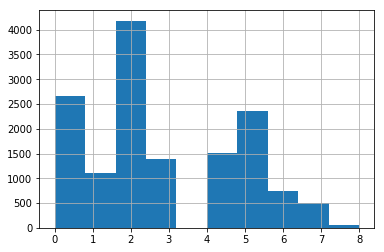

In [48]:
data,mapping = get_data(ColName,nr = 500000)

In [49]:
s1 = data[data[ColName] == 0].sample(n = 2500)
s2 = data[data[ColName] == 2].sample(n = 2500)
d = pd.concat([s1,s2])
y = d[ColName]
X = d.drop(columns = [ColName])

XGBoost Classifier: 

Balanced Accuracy is  54.79515861784513
Cross Validation Balanced Accuracy: 54.60% (2.52%)
tract_to_msamd_income 2.0092025
population 2.1160989
minority_population 1.9911513
number_of_owner_occupied_units 2.081034
number_of_1_to_4_family_units 2.2843773
loan_amount_000s 2.6931357
hud_median_family_income 2.3609164
applicant_income_000s 2.1384525
census_tract_number 2.0776727
agency_abbr_CFPB 4.4404488
agency_abbr_FDIC 2.669523
agency_abbr_FRS 3.2126398
agency_abbr_HUD 3.723265
agency_abbr_NCUA 3.9077969
agency_abbr_OCC 2.0432303
applicant_ethnicity_name_Hispanic or Latino 2.4561672
applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application 2.4447112
applicant_ethnicity_name_Not Hispanic or Latino 2.0467877
co_applicant_sex_name_Female 2.8597481
co_applicant_sex_name_Information not provided by applicant in mail, Internet, or telephone application 3.145634
co_applicant_sex_name_Male 2.7511039
co_applicant_sex_name_No 

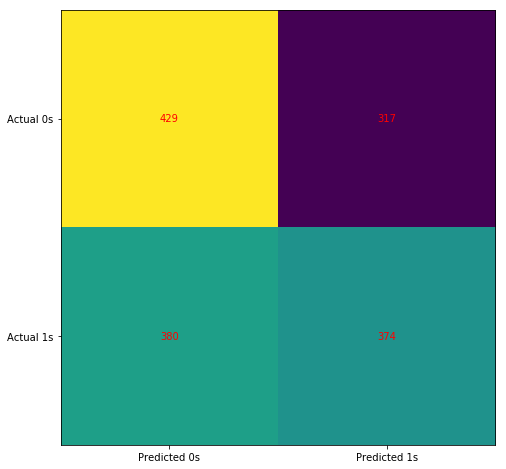

In [50]:
build_model(X,y,cross = 10,models = ['xgb','Logistic'])

# Predicting denial reason 3 

In [57]:
ColName = 'denial_reason_name_3'

C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (28,29,30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(500000, 23)
(2155, 52)
{'Insufficient cash (downpayment, closing costs)': 0, 'Unverifiable information': 1, 'Other': 2, 'Debt-to-income ratio': 3, 'Employment history': 4, 'Mortgage insurance denied': 5, 'Credit history': 6, 'Collateral': 7, 'Credit application incomplete': 8}
Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'denial_reason_name_3', 'census_tract_number', 'as_of_year',
       'agency_abbr_CFPB', 'agency_abbr_FDIC', 'agency_abbr_FRS',
       'agency_abbr_HUD', 'agency_abbr_NCUA', 'agency_abbr_OCC',
       'applicant_ethnicity_name_Hispanic or Latino',
       'applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application',
       'applicant_ethnicity_name_Not Hispanic or Latino',
       'applicant_ethnicity_name_Not applicable',
       'co_applicant

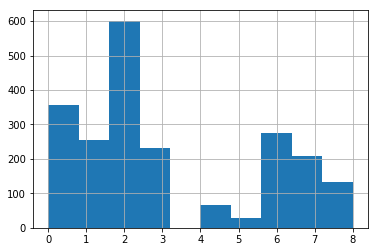

In [58]:
data,mapping = get_data(ColName,nr = 500000)

In [59]:
s1 = data[data[ColName] == 0].sample(n = np.minimum(data[data[ColName] == 0].shape[0],data[data[ColName] == 1].shape[0]))
s2 = data[data[ColName] == 2].sample(n = np.minimum(data[data[ColName] == 0].shape[0],data[data[ColName] == 2].shape[0]))
d = pd.concat([s1,s2])
y = d[ColName]
X = d.drop(columns = [ColName])

XGBoost Classifier: 

Balanced Accuracy is  56.32507507507507
Cross Validation Balanced Accuracy: 60.06% (6.10%)
tract_to_msamd_income 2.1236575
population 1.9646353
minority_population 1.8985801
number_of_owner_occupied_units 2.3245797
number_of_1_to_4_family_units 1.930006
loan_amount_000s 1.8621614
hud_median_family_income 1.8818492
applicant_income_000s 1.7593049
census_tract_number 2.0575852
agency_abbr_CFPB 2.80336
agency_abbr_HUD 9.138401
applicant_ethnicity_name_Hispanic or Latino 3.2307134
applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application 5.1154385
applicant_ethnicity_name_Not Hispanic or Latino 2.2498345
co_applicant_sex_name_Female 2.2494771
co_applicant_sex_name_No co-applicant 1.0411876
preapproval_name_Not applicable 4.6697793
preapproval_name_Preapproval was requested 4.2749906
applicant_sex_name_Female 2.4360259
lien_status_name_Secured by a first lien 26.296455
loan_purpose_name_Home improvement 1.3341323
loan_pu

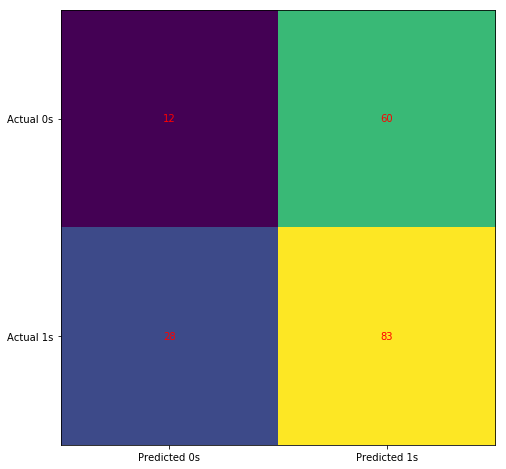

In [60]:
build_model(X,y,cross = 10,models = ['xgb','Logistic'])

In [ ]:
colnames = ['denial_reason_name_3','denial_reason_name_2','denial_reason_name_1','action_taken_name']
C1 = 'denial_reason_name_3'
C2 = 'denial_reason_name_2'
C3 = 'denial_reason_name_1'
A = pd.dataframe()
B = pd.dataframe()


data1,mapping1 = get_data(C1, nr = 1000)
data2,mapping2 = get_data(C2, nr = 1000)
data3,mapping3 = get_data(C3, nr = 1000)

for ind,val in mapping1.items():
    if ind == C1:
        j1 = val
for ind,val in mapping2.items():
    if ind == C1:
        j2 = val
for ind,val in mapping3.items():
    if ind == C1:
        j3 = val

s1 = data1[data1[C1] == j1]
s2 = data2[data2[C2] == j2]
s3 = data3[data3[C3] == j3]

d = pd.concat([s1,s2,s3])
y = d[ColName]
X = d.drop(columns = [ColName])
A = pd.concat([A,d])
B = pd.concat([B,y])

In [15]:
ColName = 'action_taken'
data = get_data(ColName,nr = 100000)
# s1 = data[data[ColName] == 1].sample(n = np.minimum(data[data[ColName] == 1].shape[0],data[data[ColName] == 3].shape[0]))
# s2 = data[data[ColName] == 3].sample(n = np.minimum(data[data[ColName] == 1].shape[0],data[data[ColName] == 3].shape[0]))
# d = pd.concat([s1,s2])
# # d[ColName].replace({1: 0, 3: 1}, inplace=True)
# y = d[ColName]
# X = d.drop(columns = [ColName])


(100000, 19)
The columns in the data are Index(['loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'action_taken', 'applicant_ethnicity',
       'co_applicant_ethnicity', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'hoepa_status', 'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units'],
      dtype='object')
(84157, 19)


In [12]:
data.shape

(8646, 19)

In [26]:
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [30]:
lams = np.random.rand(X_train.shape[0], X_train.shape[1]) # random points on [0, 1], with shape (100, 3)
lams = lams * 8 - 15 # shift values to -3, 3
lams = np.exp(lams) # transforms values to 1e-3, 1e3
X_train.to_numpy()
y_train.to_numpy()
X_test.to_numpy()
y_test.to_numpy()
random_gam =  LogisticGAM(f(0) + f(1) + f(2) + f(3) + s(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + s(11) + f(12) + f(13) + f(14) + s(15)+ s(16)+ s(17))
# model = LogisticGAM(n_splines=20)
# model.gridsearch(X_train.values, y_train.values)
random_gam.gridsearch(X_train.values, y_train.values, lam=lams)
print(model.summary())
pred = model.predict(X_test)
print("Balanced Accuracy is ",balanced_accuracy_score(y_test,pred)*100)
Acc = balanced_accuracy_score(y_test,pred)*100

N/A% (0 of 2725) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\tsmur

did not converge


C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered

KeyboardInterrupt: 

In [34]:
random_gam =  LogisticGAM(f(0) + f(1) + f(2) + f(3) + s(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + s(11) + f(12) + f(13) + f(14) + s(15)+ s(16)+ s(17))
# model = LogisticGAM(n_splines=20)
# model.gridsearch(X_train.values, y_train.values)
random_gam.gridsearch(X_train.values, y_train.values)
print(model.summary())
pred = model.predict(X_test)
print("Balanced Accuracy is ",balanced_accuracy_score(y_test,pred)*100)
Acc = balanced_accuracy_score(y_test,pred)*100

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\tsmur

did not converge


C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:133: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered

KeyboardInterrupt: 

In [40]:
random_gam =  LogisticGAM(f(0) + f(1) + f(2) + f(3) + s(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + s(11) + f(12) + f(13) + f(14) + s(15)+ s(16)+ s(17))
# model = LogisticGAM(n_splines=20)
# model.gridsearch(X_train.values, y_train.values)
random_gam.fit(X_train.values, y_train.values)
print(model.summary())
pred = model.predict(X_test)
print("Balanced Accuracy is ",balanced_accuracy_score(y_test,pred)*100)
Acc = balanced_accuracy_score(y_test,pred)*100

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     28.5432
Link Function:                        LogitLink Log Likelihood:                                 -1703.9199
Number of Samples:                         2725 AIC:                                             3464.9263
                                                AICc:                                            3465.5961
                                                UBRE:                                               3.2799
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0979
Feature Function                  Lam

C:\Users\tsmur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


In [47]:
# fig, axs = plt.subplots(1, len(X.columns))
titles = X.columns

plt.figure()
for i, term in enumerate(random_gam.terms):
    if term.isintercept:
        continue
    plt.plot(random_gam.partial_dependence(term=i))

ValueError: X data is out of domain for categorical feature 1. Expected data on [1.0, 2.0], but found data on [0.0, 0.0]

<Figure size 432x288 with 0 Axes>

In [51]:
for i, ax in enumerate(axs):
    print(i)
    XX = random_gam.generate_X_grid(term=i)
    print(XX)
    pdep, confi = random_gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);

0
[[0.5        0.         0.         ... 0.         0.         0.        ]
 [0.54040404 0.         0.         ... 0.         0.         0.        ]
 [0.58080808 0.         0.         ... 0.         0.         0.        ]
 ...
 [4.41919192 0.         0.         ... 0.         0.         0.        ]
 [4.45959596 0.         0.         ... 0.         0.         0.        ]
 [4.5        0.         0.         ... 0.         0.         0.        ]]


ValueError: X data is out of domain for categorical feature 1. Expected data on [1.0, 2.0], but found data on [0.0, 0.0]

In [34]:
new = data.groupby('loan_type').count()['action_taken']

<BarContainer object of 4 artists>

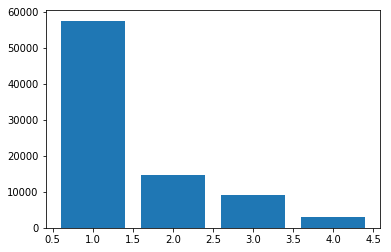

In [58]:
plt.bar([i for i in range(1,np.size(new.unique())+1)],new)

In [57]:
np.size(new.unique())

4

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd

In [20]:
trace1 = go.Bar(x=data.index, y=data[('action_taken')], name='loan_type')
# trace2 = go.Bar(x=data.index, y=data[('Quantity', 'pending')], name='Pending')
# trace3 = go.Bar(x=data.index, y=data[('Quantity', 'presented')], name='Presented')
# trace4 = go.Bar(x=data.index, y=data[('Quantity', 'won')], name='Won')

In [26]:
import jupyterlab_dash
import dash
import dash_html_components as html

viewer = jupyterlab_dash.AppViewer()
app = dash.Dash()

app.layout = html.Div(children=[
    html.H1(children='Sales Funnel Report'),
    html.Div(children='''National Sales Funnel Report.'''),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [trace1],
            'layout':
            go.Layout(title='Order Status by Customer', barmode='stack')
        })
])
viewer.show(app)

OSError: Unfortunately, the jupyterlab-dash extension is not yet
compatible with Windows

In [23]:
app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 773-822-634
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [25]:
!jupyter labextension install jupyterlab-dash@0.1.0-alpha.3

-/|\-/|\-/|\-/|\-/|-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-

Building jupyterlab assets


In [716]:
!pip install fairlearn --user
from fairlearn.reductions import GridSearch
from fairlearn.reductions import DemographicParity

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [717]:
def simple_threshold_data(number_a0, number_a1,
                          a0_threshold, a1_threshold,
                          a0_label, a1_label):

    a0s = np.full(number_a0, a0_label)
    a1s = np.full(number_a1, a1_label)

    a0_scores = np.linspace(0, 1, number_a0)
    a1_scores = np.linspace(0, 1, number_a1)
    score_feature = np.concatenate((a0_scores, a1_scores), axis=None)

    A = np.concatenate((a0s, a1s), axis=None)

    Y_a0 = [x > a0_threshold for x in a0_scores]
    Y_a1 = [x > a1_threshold for x in a1_scores]

    Y = np.concatenate((Y_a0, Y_a1), axis=None)

    X = pd.DataFrame({"credit_score_feature": score_feature,
                      "example_sensitive_feature": A})
    return X, Y, A

In [718]:
num_samples_a0 = 31
num_samples_a1 = 21

a0_threshold= 0.2
a1_threshold = 0.7

a0_label = 2
a1_label = 3

X, Y, A = simple_threshold_data(num_samples_a0, num_samples_a1, a0_threshold, a1_threshold, a0_label, a1_label)

In [719]:
import matplotlib.pyplot as plt
def plot_data(Xs, Ys):
    labels = np.unique(Xs["example_sensitive_feature"])
    
    for l in labels:
        label_string = str(l.item())
        mask = Xs["example_sensitive_feature"] == l
        plt.scatter(Xs[mask].credit_score_feature, Ys[mask], label=str("Label="+label_string))
        plt.xlabel("Credit Score")
        plt.ylabel("Got Loan")
        
    plt.legend()
    plt.show()

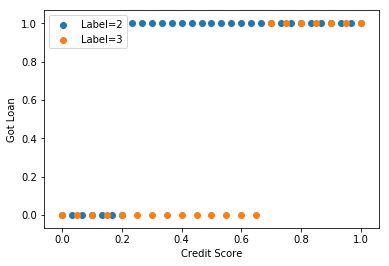

In [720]:
plot_data(X, Y)


In [721]:
unfair_model = LogisticRegression(solver='liblinear', fit_intercept=True)
unfair_model.fit(X, Y, sample_weight=np.ones(len(Y)))

unfair_model.coef_

array([[ 2.87824386, -0.8620337 ]])

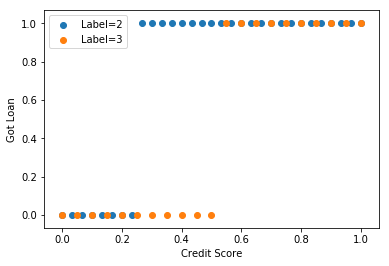

In [722]:
Y_predict_unfair = unfair_model.predict(X)
plot_data(X, Y_predict_unfair)

In [723]:
first_sweep=GridSearch(LogisticRegression(solver='liblinear', fit_intercept=True),
                       constraints=DemographicParity(),
                       grid_size=7)

first_sweep.fit(X, Y, sensitive_features=A)

In [724]:
lambda_vecs = [x.lambda_vec for x in (first_sweep.all_results)]
lambda_vecs[0]

sign  event  group_id
+     all    2           0.0
             3           0.0
-     all    2           2.0
             3           0.0
Name: 0, dtype: float64

In [725]:
actual_multipliers = [x[("+", "all", 2)]-x[("-", "all", 2)] for x in lambda_vecs]
actual_multipliers

[-2.0,
 -1.3333333333333333,
 -0.6666666666666666,
 0.0,
 0.6666666666666666,
 1.3333333333333333,
 2.0]

In [111]:
import sys
sys.path.insert(1, "../")  

import numpy as np
np.random.seed(0)

from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

In [112]:
dataset_orig = GermanDataset(
    protected_attribute_names=['age'],           # this dataset also contains protected
                                                 # attribute for "sex" which we do not
                                                 # consider in this evaluation
    privileged_classes=[lambda x: x >= 25],      # age >=25 is considered privileged
    features_to_drop=['personal_status', 'sex'] # ignore sex-related attributes
)

dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

In [113]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


In [114]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

In [115]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train, 
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000
